In [71]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# GOOGLE DOCS 
[GOOGLE PRESENTATION]( https://docs.google.com/presentation/d/1RtuN7HybiNeni5BwLArjG3-7Beh6W-Xmp9koLSAlh90/edit?usp=sharing)


In [72]:
rawdf = pd.read_csv('credit.csv')
print(f'Null Sätze: {rawdf.notnull().count()}')
print(f'NaN Sätze: {rawdf.notna().count()}')
print(f'Dupplicate {rawdf.duplicated()}')

df = rawdf[rawdf.Balance != 0]

Null Sätze: Income       409
Limit        409
Rating       409
Cards        409
Age          409
Education    409
Gender       409
Student      409
Married      409
Ethnicity    409
Balance      409
dtype: int64
NaN Sätze: Income       409
Limit        409
Rating       409
Cards        409
Age          409
Education    409
Gender       409
Student      409
Married      409
Ethnicity    409
Balance      409
dtype: int64
Dupplicate 0      False
1      False
2      False
3      False
4      False
       ...  
404     True
405     True
406     True
407     True
408     True
Length: 409, dtype: bool


In [73]:
df.count()

Income       319
Limit        319
Rating       319
Cards        319
Age          319
Education    319
Gender       319
Student      319
Married      319
Ethnicity    319
Balance      319
dtype: int64

In [74]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,49.663000,5498.206897,406.050157,3.003135,55.664577,13.438871,676.670846
std,37.731322,2044.043756,137.454340,1.419758,17.350540,3.187317,412.260201
min,10.354000,1160.000000,126.000000,1.000000,23.000000,5.000000,5.000000
25%,23.022500,4013.000000,308.000000,2.000000,42.000000,11.000000,345.000000
50%,36.929000,5149.000000,380.000000,3.000000,55.000000,14.000000,651.000000
75%,63.314500,6469.000000,470.500000,4.000000,69.000000,16.000000,963.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


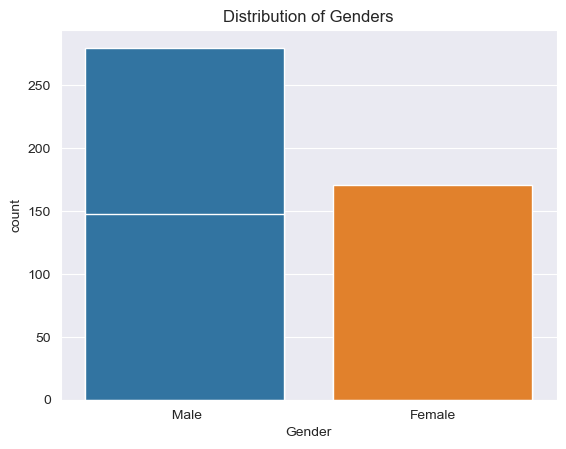

In [75]:
g = sns.countplot(df,x='Married')
f = sns.countplot(df,x='Student')
h = sns.countplot(df,x='Gender')
h.set(title = 'Distribution of Genders')
df.head(5)

/Users/lucas-pascalschmidt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


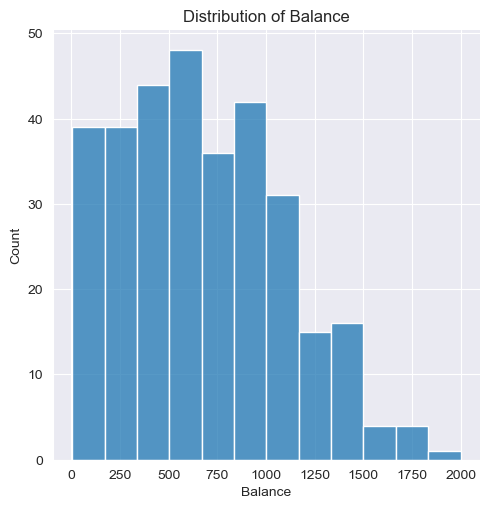

In [76]:
g = sns.displot(x='Balance',data=df,legend=True)
g.set(title = 'Distribution of Balance')


/Users/lucas-pascalschmidt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


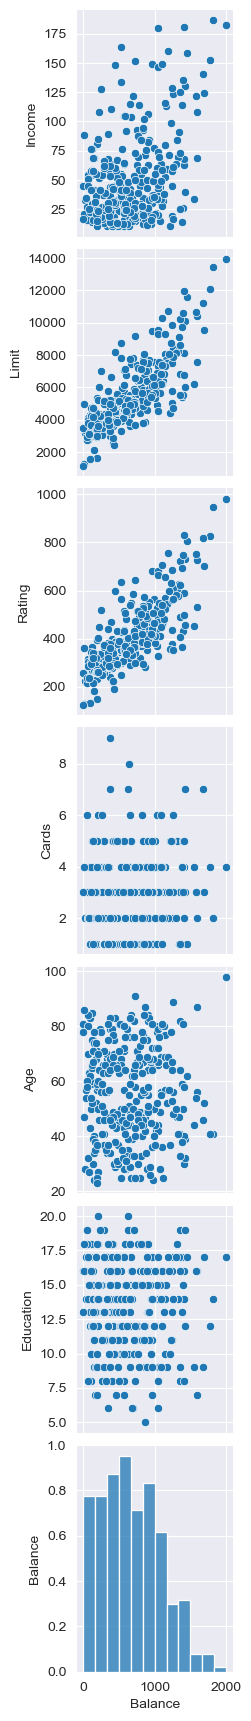

In [77]:
sns.pairplot(df, x_vars="Balance")

<Axes: xlabel='Gender', ylabel='Balance'>

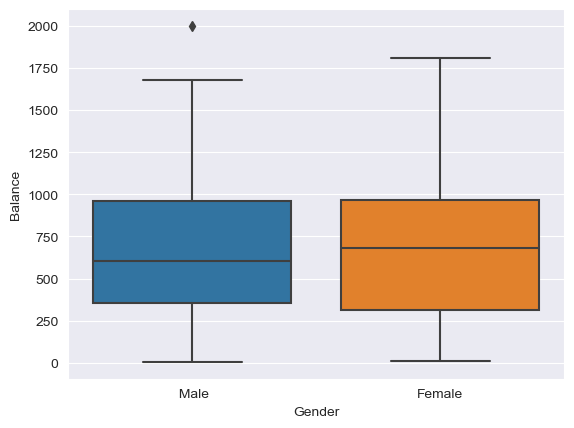

In [78]:
sns.boxplot(y='Balance',x='Gender',data=df)

<Axes: xlabel='Student', ylabel='Balance'>

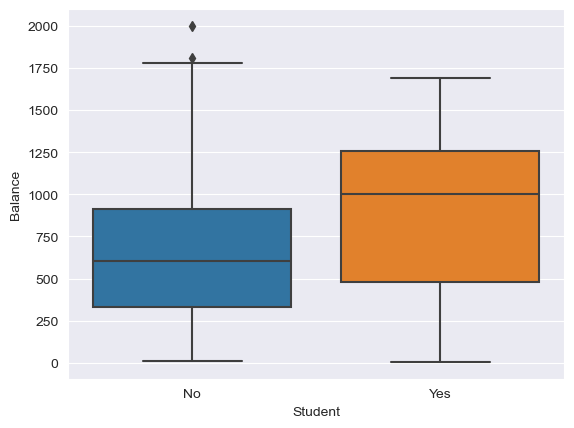

In [79]:
sns.boxplot(y='Balance',x='Student',data=df)

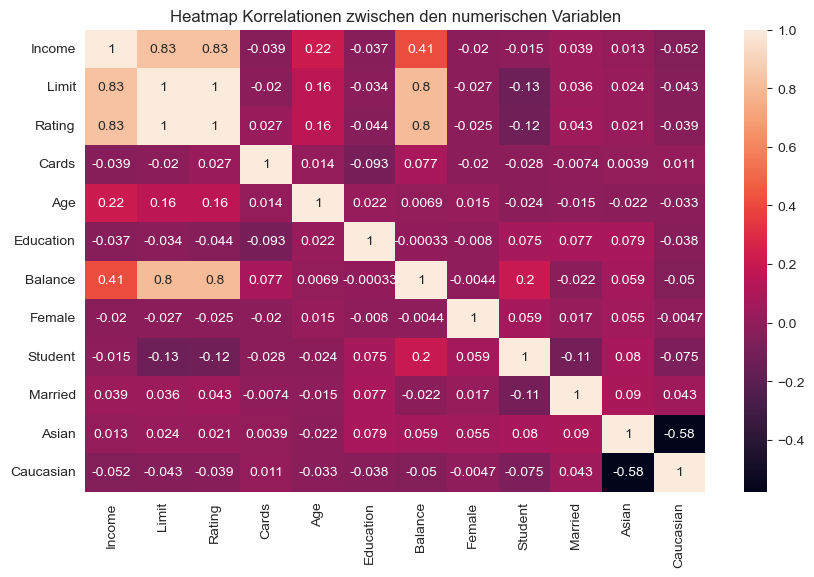

In [80]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

df = dummies('Gender',df)
df = dummies('Student',df)
df = df.rename(columns={"Yes": "Student"})
df = dummies('Married',df)
df = df.rename(columns={"Yes": "Married"})
df = dummies('Ethnicity',df)

df["Female"] = df["Female"].astype(int)
df["Student"] = df["Student"].astype(int)
df["Married"] = df["Married"].astype(int)
df["Asian"] = df["Asian"].astype(int)
df["Caucasian"] = df["Caucasian"].astype(int)

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.title("Heatmap Korrelationen zwischen den numerischen Variablen",fontsize=12)
plt.show()

[Text(0.5, 1.0, 'Balace per Education in Years')]

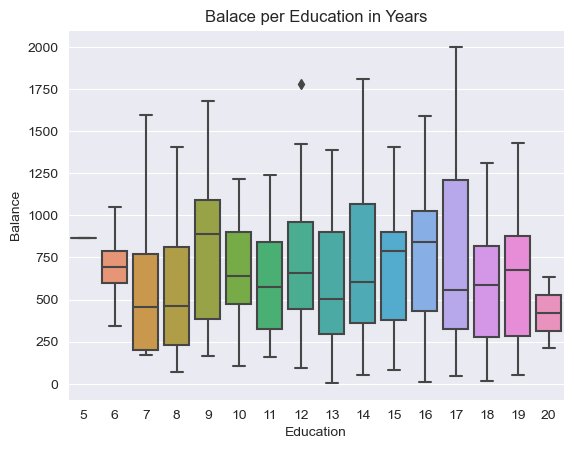

In [81]:
g = sns.boxplot(y='Balance',x='Education',data=df)
g.set(title = 'Balace per Education in Years')

In [82]:
X = df['Limit']
Y = df['Balance']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train.head()

356    6090
143    4896
74     5390
88     4307
211    5309
Name: Limit, dtype: int64

In [84]:
import statsmodels.api as sm

# Addiere Konstante auf die X-Werte
X_train_sm = sm.add_constant(X_train)

# Fitten einer Regressionsgeraden mit Ordinary Least Squares 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Übersicht über die Parameter
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     321.2
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           5.96e-45
Time:                        09:39:50   Log-Likelihood:                -1551.8
No. Observations:                 223   AIC:                             3108.
Df Residuals:                     221   BIC:                             3114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -199.2241     50.833     -3.919      0.0

/var/folders/6k/b27g2vms46qb4mwsy7_s36zr0000gp/T/ipykernel_8577/2482599947.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


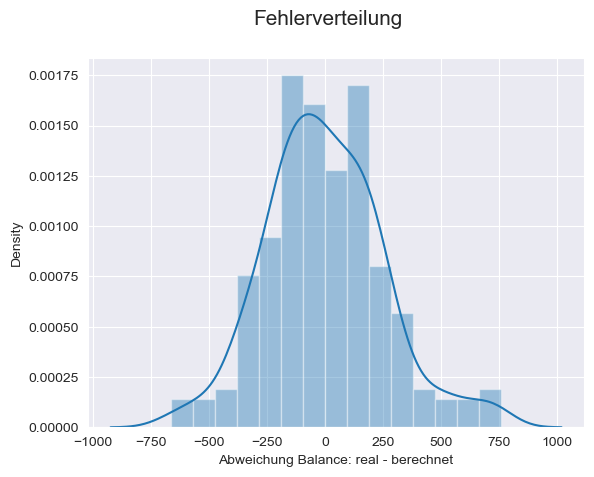

In [85]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Fehlerverteilung', fontsize = 15)
plt.xlabel('Abweichung Balance: real - berechnet', fontsize = 10)
plt.show()


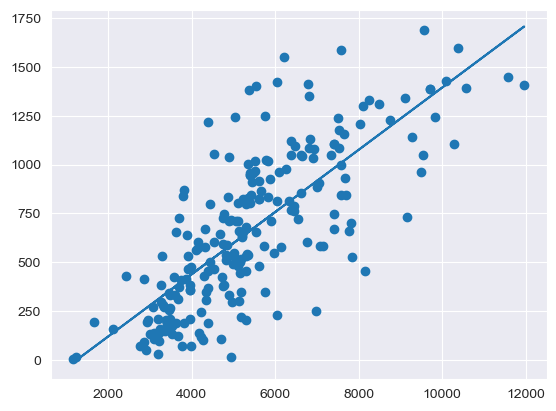

In [86]:
plt.scatter(X_train, y_train)
plt.plot(X_train,0.1593*X_train-199 )

In [87]:
df = df.rename(columns={"Yes": "Student"})

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Female,Student,Married,Asian,Caucasian
356,34.480,6090,442,3,36,14,962,0,0,0,0,1
143,19.636,4896,387,3,64,10,710,1,0,0,0,0
74,16.103,5390,418,4,45,10,945,1,0,1,0,1
88,15.560,4307,352,4,57,8,579,0,0,1,0,0
211,29.567,5309,397,3,25,15,799,0,0,0,0,1


In [88]:
scaler = MinMaxScaler()
num_vars = ["Income", "Limit", "Rating", "Cards", "Age", "Education", "Balance"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Female,Student,Married,Asian,Caucasian
356,0.141644,0.456228,0.447592,0.250,0.191176,0.600000,0.568966,0,0,0,0,1
143,0.054495,0.345734,0.369688,0.250,0.602941,0.333333,0.419144,1,0,0,0,0
74,0.033753,0.391449,0.413598,0.375,0.323529,0.333333,0.558859,1,0,1,0,1
88,0.030565,0.291227,0.320113,0.375,0.500000,0.200000,0.341260,0,0,1,0,0
211,0.112800,0.383953,0.383853,0.250,0.029412,0.666667,0.472057,0,0,0,0,1


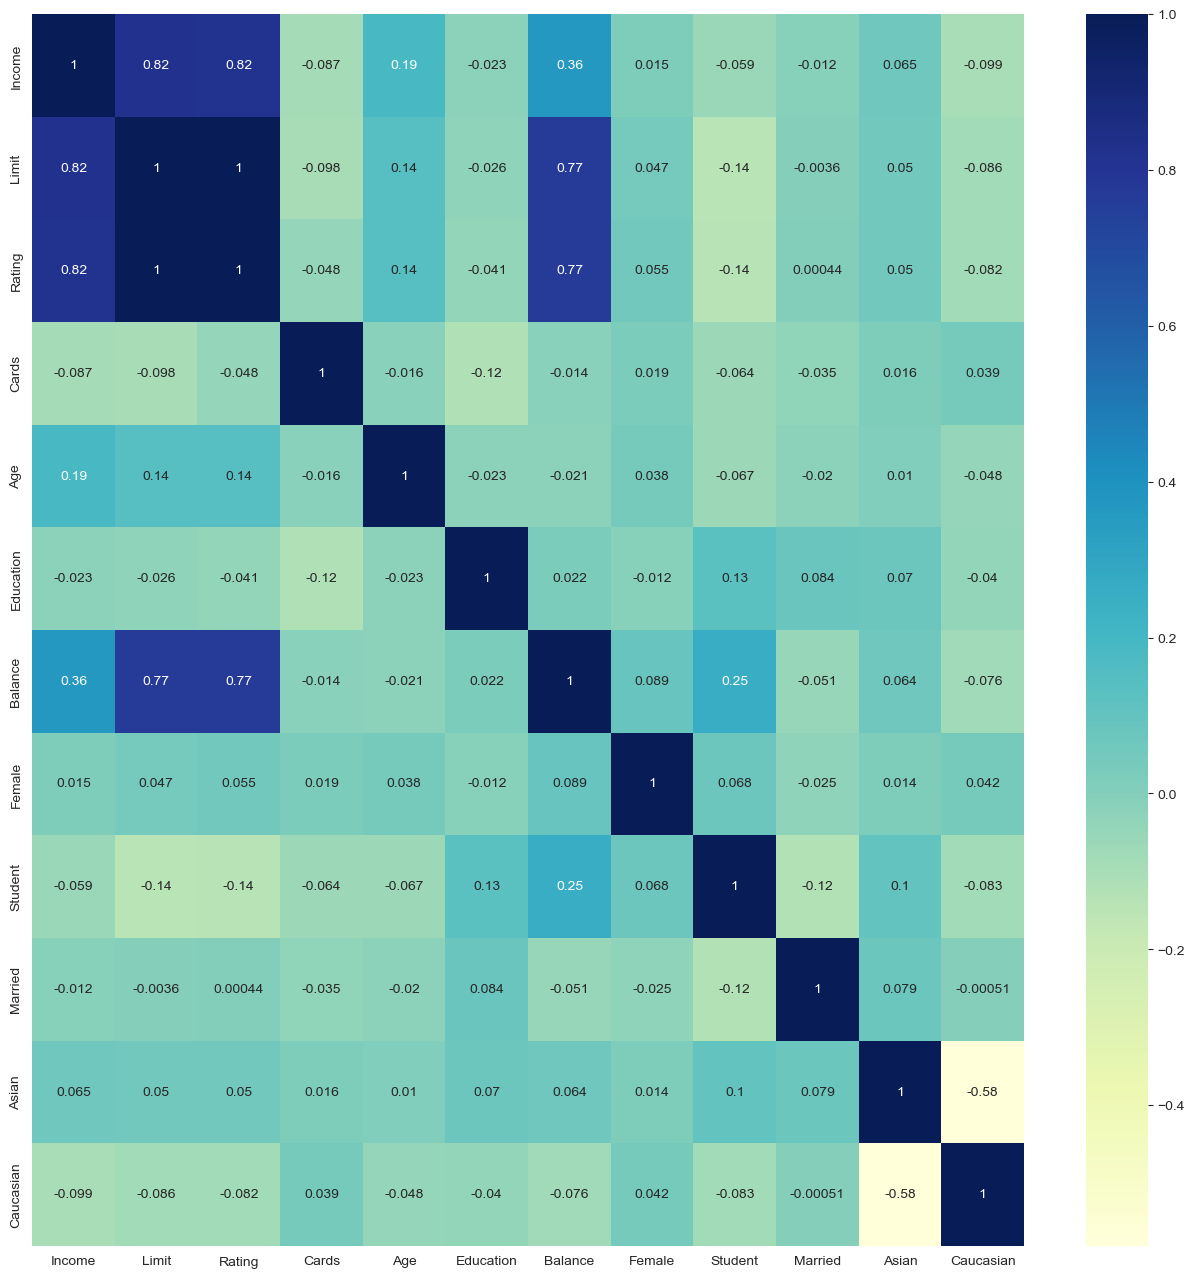

In [89]:
plt.figure(figsize = (16, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [91]:
y_train = df_train.pop('Balance')
X_train = df_train

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

Index(['Income', 'Limit', 'Rating', 'Cards', 'Student'], dtype='object')

In [93]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,Income,Limit,Rating,Cards,Student
356,0.141644,0.456228,0.447592,0.250,0
143,0.054495,0.345734,0.369688,0.250,0
74,0.033753,0.391449,0.413598,0.375,0
88,0.030565,0.291227,0.320113,0.375,0
211,0.112800,0.383953,0.383853,0.250,0


In [94]:
#function Modellbildung
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

#function Prüfen des variance inflation factors (zeigt Kolinearität)
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [95]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.793e+04
Date:                Thu, 08 Feb 2024   Prob (F-statistic):          9.63e-282
Time:                        09:43:55   Log-Likelihood:                 676.40
No. Observations:                 223   AIC:                            -1341.
Df Residuals:                     217   BIC:                            -1320.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2782      0.003    -93.173      0.0

In [97]:
X_train_new = X_train_rfe.drop(["Rating"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.230e+04
Date:                Thu, 08 Feb 2024   Prob (F-statistic):          1.70e-283
Time:                        09:45:55   Log-Likelihood:                 675.34
No. Observations:                 223   AIC:                            -1341.
Df Residuals:                     218   BIC:                            -1324.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2762      0.003   -103.994      0.0

In [100]:
checkVIF(X_train_new)

,Features,VIF
0,const,11.22
2,Limit,3.18
1,Income,3.12
4,Student,1.04
3,Cards,1.02


/var/folders/6k/b27g2vms46qb4mwsy7_s36zr0000gp/T/ipykernel_8577/2364973687.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

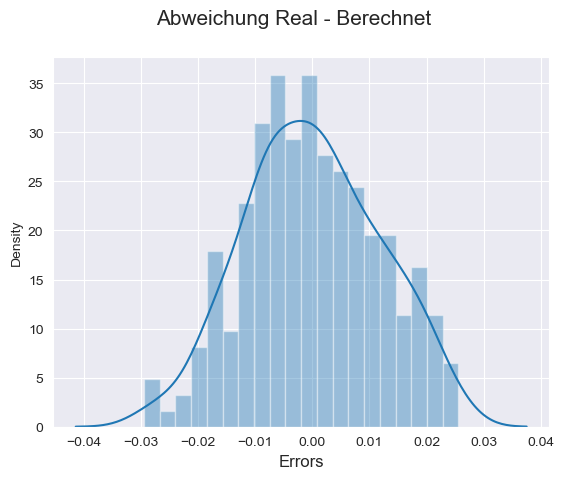

In [101]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Abweichung Real - Berechnet', fontsize = 15)                  # Plot heading
plt.xlabel('Errors', fontsize = 12)

In [102]:
df_test1=df_test.copy()
y_test_balance = df_test1.pop('Balance')
num_vars = ["Income", "Limit", "Rating", "Cards", "Age", "Education", "Balance"]
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
y_test = df_test.pop('Balance')
X_test = df_test


In [103]:
# Modell anwenden
X_train_new = X_train_new.drop('const',axis=1)
# Neuer Testdatensatz (weglassen der überflüssigen Spalten)
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [104]:
# Vorhersagen für y berechnen
y_pred = lm.predict(X_test_new)

# Vergleiche reale Daten mit den modellierten Daten
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8007585669398254

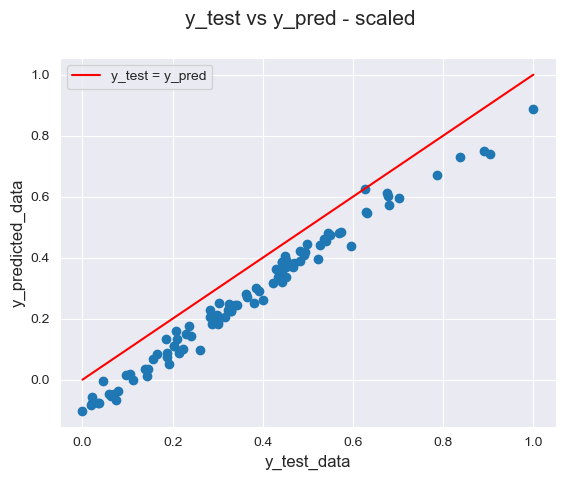

In [105]:
#Modell evaluieren
# Plotte y_test und y_pred in ein Streudiagramm
def linear_function(x):
    return 1* x

x_range = np.linspace(0, 1, 10)
y_function = linear_function(x_range)

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred - scaled', fontsize=15)
plt.xlabel('y_test_data', fontsize=12)
plt.ylabel('y_predicted_data', fontsize=12)
plt.plot(x_range, y_function, label='y_test = y_pred', color='red')
plt.legend()
plt.show()

In [106]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.230e+04
Date:                Thu, 08 Feb 2024   Prob (F-statistic):          1.70e-283
Time:                        09:53:50   Log-Likelihood:                 675.34
No. Observations:                 223   AIC:                            -1341.
Df Residuals:                     218   BIC:                            -1324.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2762      0.003   -103.994      0.0